# Objetivos de la investigación

# Preguntas

1. ¿Qué tipo de información se repite con mayor frecuencia entre los datos en los archivos o hoja de Excel?
2. ¿Cuál es el principal problema que el proyecto busca solucionar para la Tienda Aurelion?
3. ¿Cuáles son los 10 productos más vendidos en cantidad?
4. ¿Cuáles son los 10 productos que generan más ingresos?
5. ¿Quiénes son los 20 clientes que más compran en términos de ingresos?
6. ¿Cómo se espera que con la nueva organización o gestión de la información el tiempo de busqueda mejore?
7. ¿Cuál es la compra media por cliente?
8. ¿Cuántos pedidos totales se han realizado?
9. ¿Cuál es el valor promedio por pedido?
10. ¿Qué campos o columnas se consideran esenciales en la base de datos?
11. ¿Cómo modificar la estructura actual para identificar a los "clientes VIP" (los que compran con más frecuencia) y ofrecerles descuentos especiales?
12. ¿Cuál es el método de pago que más se utiliza?
13. ¿Cuál es el barrio o ciudad que tiene más ventas?
14. ¿Cuál es el ingreso total generado?
15. ¿Cómo ha sido la tendencia de ingresos mensuales?
16. ¿Cuál es el cantidad total vendida?
17. ¿Cómo ha sido la tendencia de la cantidad vendida mensualmente?

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_TIME, "es_PE.UTF-8")

'es_PE.UTF-8'

Importando los archivos excel que contienen datos limpios.

In [73]:
limpio_clientes = pd.read_excel(r"C:\Users\HP\Desktop\Trabajos para prender\Guayerd AI\Marcio Mallqui - Proyecto Aurelion (Modificado)\Datos limpios\limpio_clientes.xlsx")
limpio_detalle_ventas = pd.read_excel(r"C:\Users\HP\Desktop\Trabajos para prender\Guayerd AI\Marcio Mallqui - Proyecto Aurelion (Modificado)\Datos limpios\limpio_detalle_ventas.xlsx")
limpio_productos = pd.read_excel(r"C:\Users\HP\Desktop\Trabajos para prender\Guayerd AI\Marcio Mallqui - Proyecto Aurelion (Modificado)\Datos limpios\limpio_productos.xlsx")
limpio_ventas = pd.read_excel(r"C:\Users\HP\Desktop\Trabajos para prender\Guayerd AI\Marcio Mallqui - Proyecto Aurelion (Modificado)\Datos limpios\limpio_ventas.xlsx")

Realizamos copias de los dataframe

In [74]:
cliente_df  = limpio_clientes.copy()
detalle_ventas_df = limpio_detalle_ventas.copy()
productos_df = limpio_productos.copy()
ventas_df = limpio_ventas.copy()

Exploramos las primeras 5 filas de los archivos y mostramos su estructura general.

In [75]:
cliente_df.head()

,id_cliente,nombre_cliente,email,ciudad,fecha_alta
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01
1,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02
2,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03
3,4,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05


In [76]:
productos_df.head()

,id_producto,nombre_producto,categoria,precio_unitario
0,1,Coca Cola 1.5L,Alimentos,2347
1,2,Pepsi 1.5L,Limpieza,4973
2,3,Sprite 1.5L,Alimentos,4964
3,4,Fanta Naranja 1.5L,Limpieza,2033
4,5,Agua Mineral 500ml,Alimentos,4777


In [77]:
detalle_ventas_df.head()

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,90,Toallas Húmedas x50,1,2902,2902
1,2,82,Aceitunas Negras 200g,5,2394,11970
2,2,39,Helado Vainilla 1L,5,469,2345
3,2,70,Fernet 750ml,2,4061,8122
4,2,22,Medialunas de Manteca,1,2069,2069


In [71]:
ventas_df.head()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,mes,anio,nombre_mes
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,6,2024,Junio
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo
2,3,2024-01-13,20,Tomas Acosta,tomas.acosta@mail.com,tarjeta,1,2024,Enero
3,4,2024-02-27,36,Martina Molina,martina.molina@mail.com,transferencia,2,2024,Febrero
4,5,2024-06-11,56,Bruno Diaz,bruno.diaz@mail.com,tarjeta,6,2024,Junio


Verificamos cuantas filas y columnas tienen los DataFrame

In [64]:
tablas1  = [cliente_df, ventas_df, detalle_ventas_df, productos_df]
tablas1_nombre = ['cliente_df', 'ventas_df', 'detalle_ventas_df', 'productos_df']
for i in range(len(tablas1)):
    print(f"filas y coluntas tiene tabla {tablas1_nombre[i]}: {tablas1[i].shape}")

filas y coluntas tiene tabla cliente_df: (100, 5)
filas y coluntas tiene tabla ventas_df: (120, 9)
filas y coluntas tiene tabla detalle_ventas_df: (343, 6)
filas y coluntas tiene tabla productos_df: (100, 4)


# Análisis exploratorio de datos

* Las ventas se realizaron desde enero hasta junio de 2024

In [78]:
ventas_df['anio'].unique()

array([2024], dtype=int64)

In [82]:
ventas_df['nombre_mes'].unique()

array(['Junio', 'Marzo', 'Enero', 'Febrero', 'Mayo', 'Abril'],
      dtype=object)

* Se observa que las ciudades son del país de Argentina.

In [83]:
cliente_df['ciudad'].unique()

array(['Carlos Paz', 'Rio Cuarto', 'Cordoba', 'Villa Maria',
       'Alta Gracia', 'Mendiolaza'], dtype=object)

#### Distribución de precios mediante diagrama de caja e histograma, respectivamente.

In [84]:
productos_df.columns

Index(['id_producto', 'nombre_producto', 'categoria', 'precio_unitario'], dtype='object')

In [85]:
productos_df.describe()

,id_producto,precio_unitario
count,100.000000,100.000000
mean,50.500000,2718.550000
std,29.011492,1381.635324
min,1.000000,272.000000
25%,25.750000,1590.000000
50%,50.500000,2516.000000
75%,75.250000,4026.500000
max,100.000000,4982.000000


In [86]:
# cálculamos la moda
productos_df['precio_unitario'].mode()

0    2512
Name: precio_unitario, dtype: int64

In [87]:
# Se observa que la media  es mayor que la mediana
2718.55 > 2516.00

True

Si media > mediana, la distribución es asimétrica con cola a la derecha (sesgada a la derecha).

d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


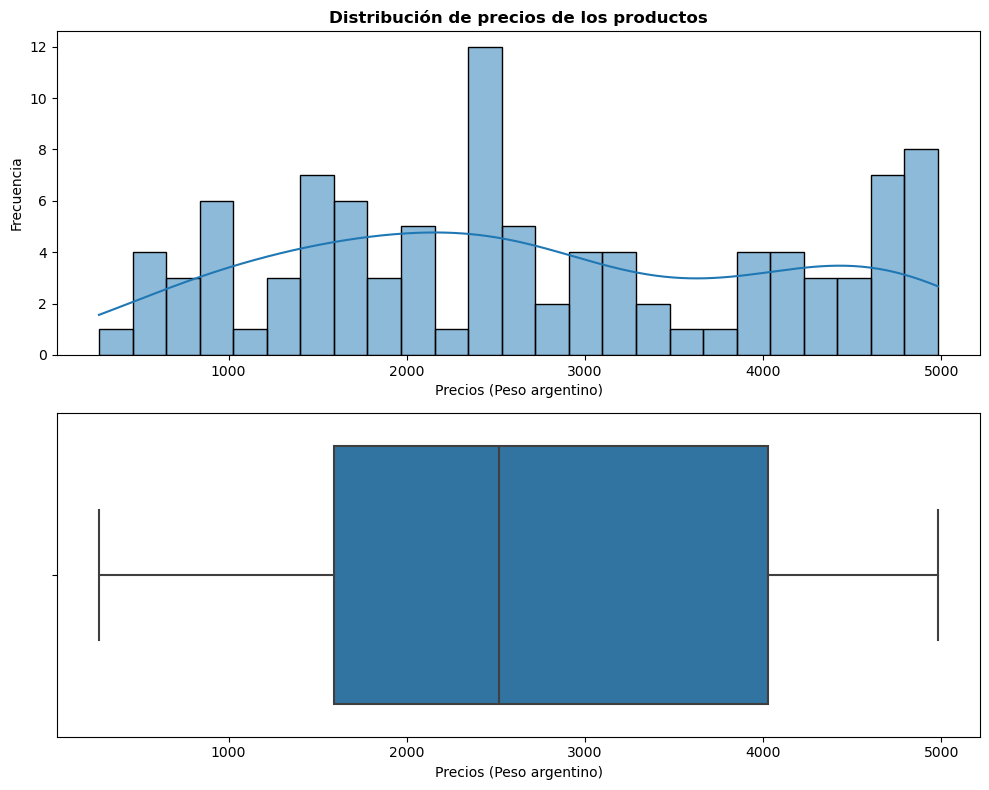

In [88]:
# Visualizaciones
plt.figure(figsize=(10, 8))

# Gráfico de distribución de precios de alquiler
plt.subplot(2, 1, 1)
sns.histplot(data= productos_df, x = 'precio_unitario', stat='count', bins= 25, kde = True)
plt.title('Distribución de precios de los productos',weight='bold')
plt.xlabel('Precios (Peso argentino)')
plt.ylabel('Frecuencia')

#plt.xlim(0, 5000)
# Gráfico de caja
plt.subplot(2, 1, 2)
sns.boxplot(data= productos_df, x= 'precio_unitario')
plt.xlabel('Precios (Peso argentino)')
plt.tight_layout()
plt.show()

#### Análisis del histograma:

- El eje $x$ representa el precio en pesos argentinos, mientras que el eje $y$ muestra la frecuencia de productos en los distintos niveles de precio. Se observa una ligera asimetría positiva (sesgo hacia la derecha), lo que indica que existen algunos productos con precios relativamente altos.

#### Análisis del gráfico de caja y bigote:
- Se observa que el 50% de los productos su precio está entre 1590 y 4026.5 pesos argentinos. No se observan valores atípicos.

#### Distribución de las ventas totales (Importe) mediante diagrama de caja e histograma, respectivamente.


In [90]:
detalle_ventas_df.columns

Index(['id_venta', 'id_producto', 'nombre_producto', 'cantidad',
       'precio_unitario', 'importe'],
      dtype='object')

In [91]:
detalle_ventas_df.describe()

,id_venta,id_producto,cantidad,precio_unitario,importe
count,343.000000,343.000000,343.000000,343.000000,343.000000
mean,61.492711,49.139942,2.962099,2654.495627,7730.078717
std,34.835525,29.135461,1.366375,1308.694720,5265.543077
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1618.500000,3489.000000
50%,61.000000,47.000000,3.000000,2512.000000,6702.000000
75%,93.000000,76.000000,4.000000,3876.000000,10231.500000
max,120.000000,100.000000,5.000000,4982.000000,24865.000000


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


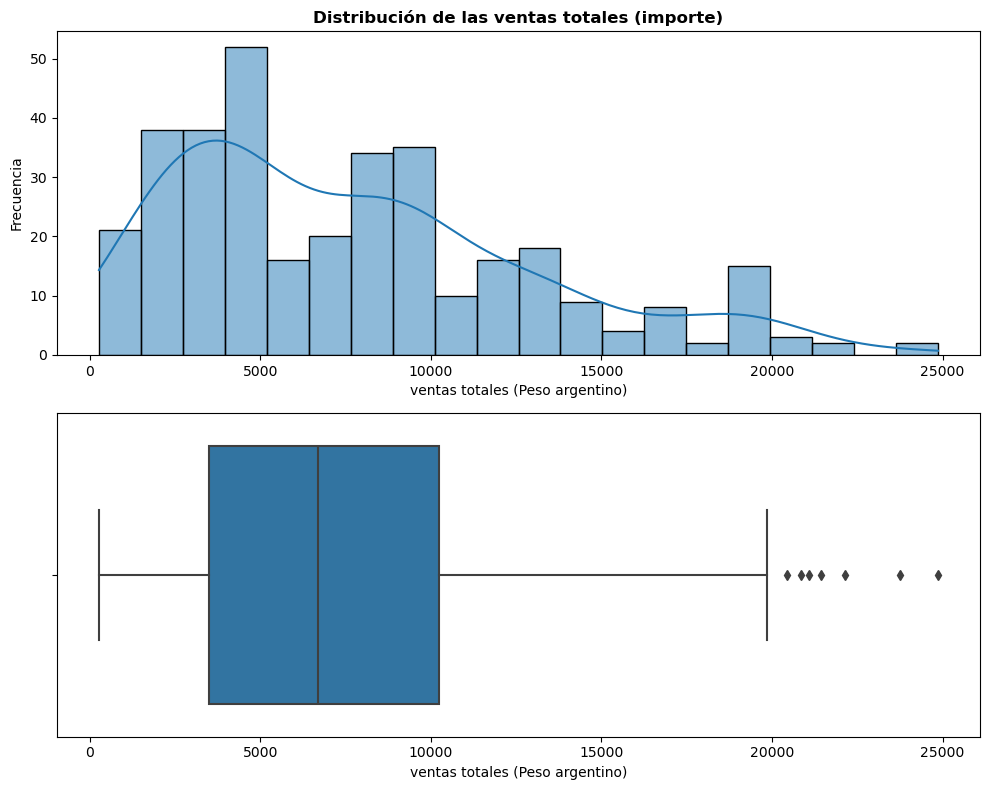

In [92]:
# Visualizaciones
plt.figure(figsize=(10, 8))

# Gráfico de distribución de precios de alquiler
plt.subplot(2, 1, 1)
sns.histplot(data= detalle_ventas_df, x = 'importe', stat='count', bins= 20, kde = True)
plt.title('Distribución de las ventas totales (importe)',weight='bold')
plt.xlabel('ventas totales (Peso argentino)')
plt.ylabel('Frecuencia')

#plt.xlim(0, 5000)
# Gráfico de caja
plt.subplot(2, 1, 2)
sns.boxplot(data= detalle_ventas_df, x = 'importe')
#plt.vlines(20345.25, 50,70 , colors= 'red' )
plt.xlabel('ventas totales (Peso argentino)')
plt.tight_layout()
plt.show()

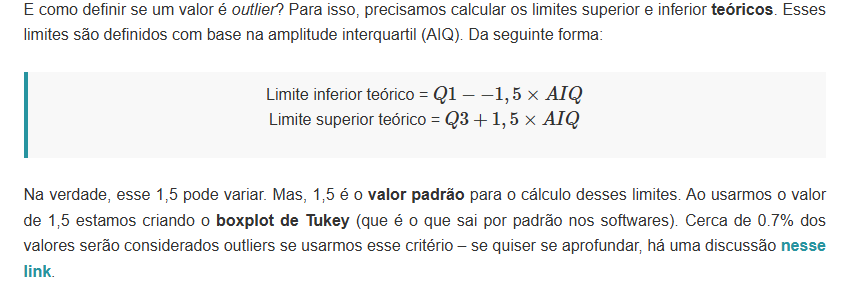

In [93]:
rango_intercuartilico = detalle_ventas_df['importe'].quantile(0.75) - detalle_ventas_df['importe'].quantile(0.25)
limite_inferior_importe = detalle_ventas_df['importe'].quantile(0.25) - (1.5 * (rango_intercuartilico))
limite_superior_importe = detalle_ventas_df['importe'].quantile(0.75) +  (1.5 * (rango_intercuartilico))
print(round(limite_inferior_importe,0))
print(round(limite_superior_importe,0))

-6625.0
20345.0


Mostramos cuales son esos datos atípicos

In [94]:
detalle_ventas_df[detalle_ventas_df['importe'] > 20345]

,id_venta,id_producto,nombre_producto,cantidad,precio_unitario,importe
41,16,35,Barrita de Cereal 30g,5,4430,22150
54,21,76,Pizza Congelada Muzzarella,5,4286,21430
141,50,58,Caramelos Masticables,5,4752,23760
175,63,8,Energética Nitro 500ml,5,4218,21090
208,75,2,Pepsi 1.5L,5,4973,24865
260,94,86,Jugo en Polvo Limón,5,4090,20450
308,110,6,Jugo de Naranja 1L,5,4170,20850


Se ignoraron los datos atípicos con la finalidad de evitar que los valores extremos afecten el cálculo de la media.

In [95]:
detalle_ventas_df_sin_outliers = detalle_ventas_df[detalle_ventas_df['importe'] <= 20345]
#detalle_ventas_df_sin_outliers.head()
print(detalle_ventas_df_sin_outliers.shape)

(336, 6)


In [96]:
detalle_ventas_df_sin_outliers.describe()

,id_venta,id_producto,cantidad,precio_unitario,importe
count,336.000000,336.000000,336.000000,336.000000,336.000000
mean,61.497024,49.357143,2.919643,2617.776786,7431.017857
std,34.880863,29.022130,1.348111,1296.255224,4884.828703
min,1.000000,1.000000,1.000000,272.000000,272.000000
25%,31.000000,23.000000,2.000000,1590.000000,3445.500000
50%,60.500000,47.500000,3.000000,2502.000000,6541.000000
75%,93.000000,76.000000,4.000000,3848.000000,10048.000000
max,120.000000,100.000000,5.000000,4982.000000,19856.000000


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


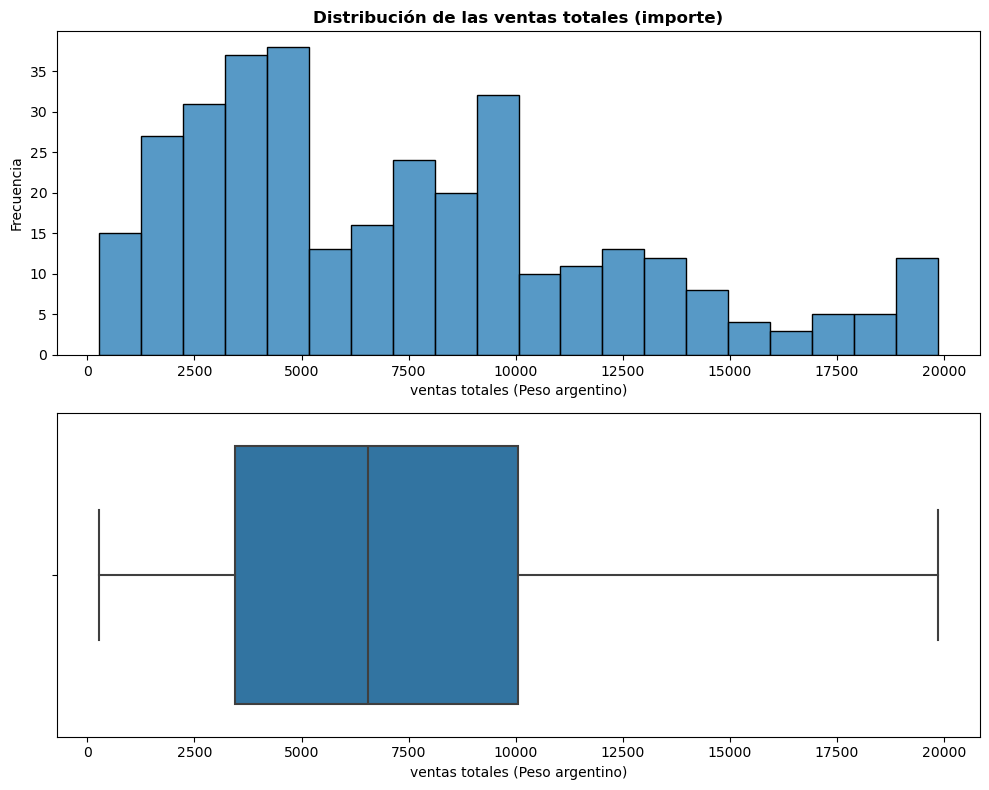

In [99]:
# Visualizaciones
plt.figure(figsize=(10, 8))

# Gráfico de distribución de precios de alquiler
plt.subplot(2, 1, 1)
sns.histplot(data= detalle_ventas_df_sin_outliers, x = 'importe', stat='count', bins= 20)
plt.title('Distribución de las ventas totales (importe)',weight='bold')
plt.xlabel('ventas totales (Peso argentino)')
plt.ylabel('Frecuencia')

#plt.xlim(0, 5000)
# Gráfico de caja
plt.subplot(2, 1, 2)
sns.boxplot(data= detalle_ventas_df_sin_outliers, x = 'importe')
#plt.vlines(20345.25, 50,70 , colors= 'red' )
plt.xlabel('ventas totales (Peso argentino)')
plt.tight_layout()
plt.show()

#### Análisis del histograma:

- El eje $x$ representa las ventas totales en pesos argentinos, mientras que el eje $y$ muestra la frecuencia de ventas de diferentes productos en distintos rangos de importe. Se observa que la distribución del importe presenta una asimetría positiva (sesgo hacia la derecha), lo que indica que la mayoría de las ventas totales corresponden a montos relativamente bajos, mientras que las ventas de montos muy altos son menos frecuentes.

#### Análisis del gráfico de caja y bigote:

- $\text{50%}$ de las ventas totales se concentró en el amplio rango de 3446 y 10048 pesos argentinos.

## 3. ¿Cuáles son los 10 productos más vendidos en cantidad?

In [101]:
# detalle_ventas_df_sin_outliers.head()

In [102]:
product_cantidad_10 = detalle_ventas_df_sin_outliers.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False).head(10)
product_cantidad_10 = product_cantidad_10.reset_index()
product_cantidad_10

,nombre_producto,cantidad
0,Salsa de Tomate 500g,27
1,Queso Rallado 150g,26
2,Hamburguesas Congeladas x4,24
3,Aceitunas Verdes 200g,22
4,Vino Blanco 750ml,22
5,Lavandina 1L,21
6,Ron 700ml,21
7,Mermelada de Frutilla 400g,21
8,Desodorante Aerosol,20
9,Yerba Mate Suave 1kg,20


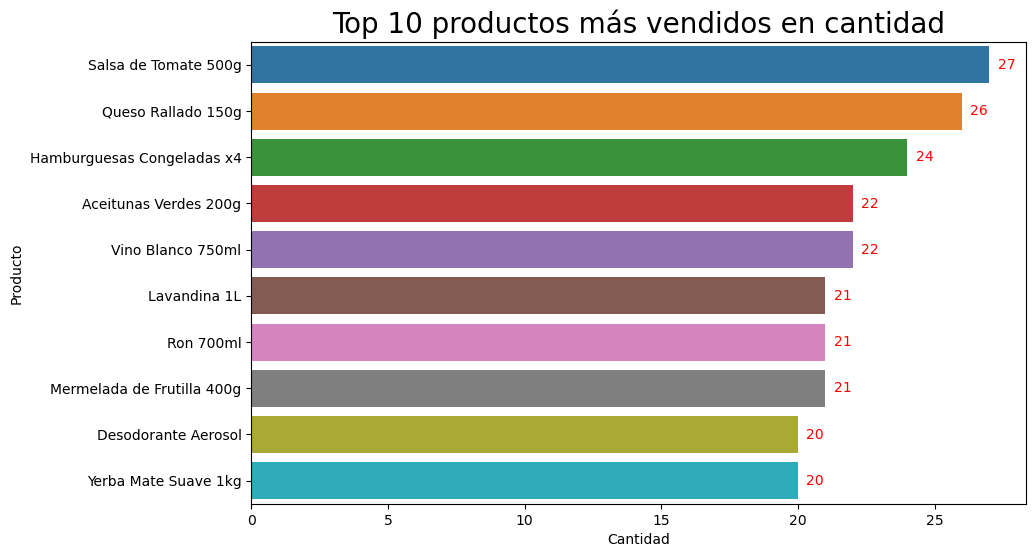

In [103]:
# Visualizaciones
plt.figure(figsize=(10, 6))

sns.barplot(product_cantidad_10, y='nombre_producto', x='cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Producto')
plt.title('Top 10 productos más vendidos en cantidad', fontsize = 20)

# Añadir etiquetas con los valores
for i, value in enumerate(product_cantidad_10['cantidad']):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=10, color='red')

plt.show()

## 4. ¿Cuáles son los 10 productos que generan más ingresos?

In [104]:
# detalle_ventas_df_sin_outliers.head()

In [105]:
product_importe_10 = detalle_ventas_df_sin_outliers.groupby('nombre_producto')['importe'].sum().sort_values(ascending=False).head(10)
product_importe_10 = product_importe_10.reset_index()
product_importe_10

,nombre_producto,importe
0,Desodorante Aerosol,93800
1,Queso Rallado 150g,89544
2,Ron 700ml,81396
3,Yerba Mate Suave 1kg,77560
4,Chicle Menta,68628
5,Pizza Congelada Muzzarella,64290
6,Vino Blanco 750ml,59048
7,Hamburguesas Congeladas x4,58080
8,Aceitunas Verdes 200g,55440
9,Trapo de Piso,53394


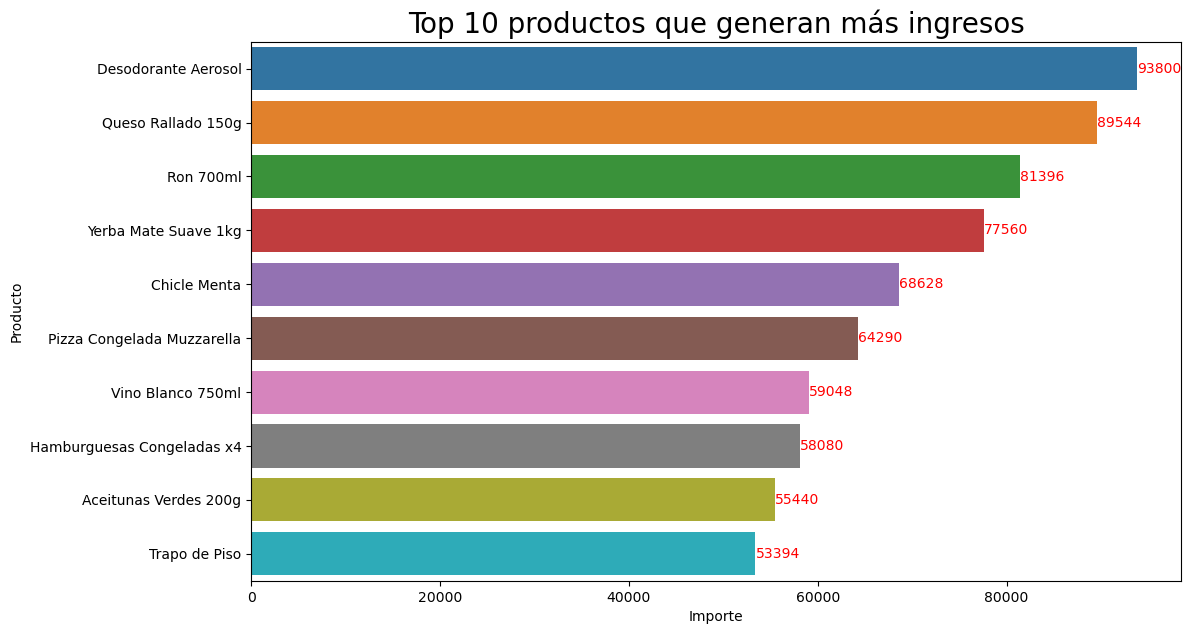

In [106]:
# Visualizaciones
plt.figure(figsize=(12, 7))

sns.barplot(product_importe_10, y='nombre_producto', x='importe')
plt.xlabel('Importe')
plt.ylabel('Producto')
plt.title('Top 10 productos que generan más ingresos', fontsize = 20)

# Añadir etiquetas con los valores
for i, value in enumerate(product_importe_10['importe']):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=10, color='red')


plt.show()

#### Teniendo en cuenta los 10 productos más vendidos en cantidad y los 10 productos que generan más ingresos.

#### Análisis:

* Queso Rallado 150g ocupa el segundo lugar tanto en cantidad vendida como en ingresos. Es un producto importante para la tienda porque se vende bien y deja buenas ganancias.

* Salsa de Tomate 500g es el producto que más se vende, pero genera pocas ganancias porque su precio es bajo. Aun así, es un producto que los clientes compran con frecuencia y ayuda a mantener buenas ventas.

* Desodorante Aerosol es el producto que más dinero genera, aunque se vende en menor cantidad. Su precio es alto, por eso aporta buenas ganancias, pero no todos los clientes lo compran.

* Chicle Menta, Pizza Congelada Muzzarella y Trapo de Piso no estan entre los 10 productos más vendidos en cantidad, pero igual aportan bastante dinero a la tienda porque tienen precios más altos. Esto puede hacer que la gente los compre con menos frecuencia.

## 14. ¿Cuál es el ingreso total generado?

In [107]:
detalle_ventas_df_sin_outliers['importe'].sum()

2496822

- Durante el periodo de enero a junio de 2024, la tienda gano 2496822 pesos argentinos en total.

## 16. ¿Cuál es el cantidad total vendida?

In [108]:
detalle_ventas_df_sin_outliers['cantidad'].sum()

981

- Durante el periodo de enero a junio de 2024, la tienda registró la venta de 981 productos en total.

## 15. ¿Cómo ha sido la tendencia de ingresos mensuales?

In [114]:
# detalle_ventas_df.head()

In [116]:
# ventas_df.head()

In [117]:
# Unión del dataframe de dettale ventas y ventas.
df_detallevent_ventas = pd.merge(ventas_df, detalle_ventas_df_sin_outliers, on = 'id_venta')
df_detallevent_ventas.head()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,mes,anio,nombre_mes,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,6,2024,Junio,90,Toallas Húmedas x50,1,2902,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,82,Aceitunas Negras 200g,5,2394,11970
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,39,Helado Vainilla 1L,5,469,2345
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,70,Fernet 750ml,2,4061,8122
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,22,Medialunas de Manteca,1,2069,2069


In [112]:
# df_detallevent_ventas = pd.merge(ventas_df, detalle_ventas_df, left_on='id_venta', right_on='id_venta')
# df_detallevent_ventas.head()

In [118]:
mes_importe = df_detallevent_ventas.groupby(['mes', 'nombre_mes'])['importe'].sum()
mes_importe = mes_importe.reset_index()
mes_importe

,mes,nombre_mes,importe
0,1,Enero,506080
1,2,Febrero,407041
2,3,Marzo,367813
3,4,Abril,229374
4,5,Mayo,516117
5,6,Junio,470397


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


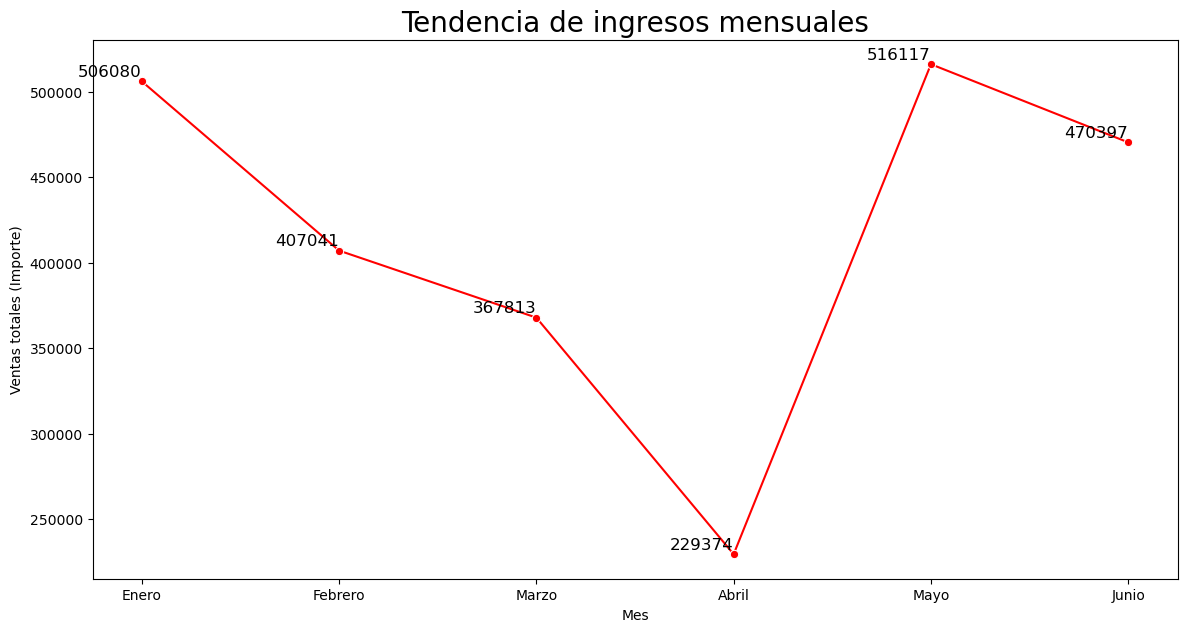

In [121]:
plt.figure(figsize=(14, 7))

# Crear el gráfico de líneas
sns.lineplot(mes_importe, x= 'nombre_mes', y = 'importe', color = 'red', linestyle='-', marker='o')

# Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Ventas totales (Importe)')
plt.title('Tendencia de ingresos mensuales', fontsize = 20)

# Agregar etiquetas sobre cada punto
for i in range(len(mes_importe)):
    plt.text(mes_importe['nombre_mes'][i],
             mes_importe['importe'][i] + 10000,   # Ajusta la altura de la etiqueta
             str(round(mes_importe['importe'][i], 0)),
             ha='right', va='top', fontsize=12, color='black')

plt.show()

## 17. ¿Cómo ha sido la tendencia de la cantidad vendida mensualmente?

In [122]:
df_detallevent_ventas.head()

,id_venta,fecha,id_cliente,nombre_cliente,email,medio_pago,mes,anio,nombre_mes,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,2024-06-19,62,Guadalupe Romero,guadalupe.romero@mail.com,tarjeta,6,2024,Junio,90,Toallas Húmedas x50,1,2902,2902
1,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,82,Aceitunas Negras 200g,5,2394,11970
2,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,39,Helado Vainilla 1L,5,469,2345
3,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,70,Fernet 750ml,2,4061,8122
4,2,2024-03-17,49,Olivia Gomez,olivia.gomez@mail.com,qr,3,2024,Marzo,22,Medialunas de Manteca,1,2069,2069


In [124]:
mes_cantidad = df_detallevent_ventas.groupby(['mes', 'nombre_mes'])['cantidad'].sum()
mes_cantidad = mes_cantidad.reset_index()
mes_cantidad

,mes,nombre_mes,cantidad
0,1,Enero,200
1,2,Febrero,173
2,3,Marzo,144
3,4,Abril,95
4,5,Mayo,196
5,6,Junio,173


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


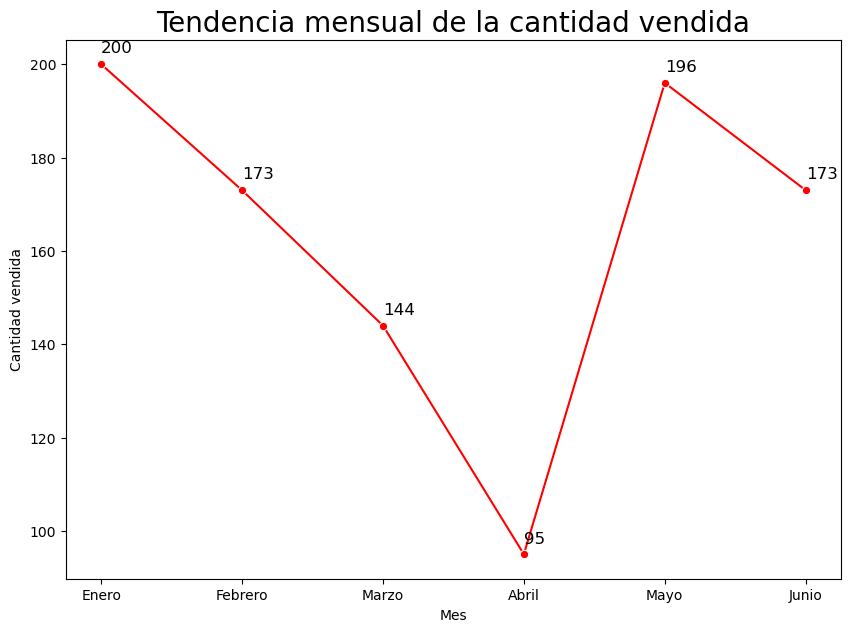

In [127]:
plt.figure(figsize=(10, 7))

# Crear el gráfico de líneas
sns.lineplot(mes_cantidad, x= 'nombre_mes', y = 'cantidad', color = 'red', linestyle='-', marker='o')

# Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Cantidad vendida')
plt.title("Tendencia mensual de la cantidad vendida", fontsize = 20)
# Agregar etiquetas sobre cada punto
for i in range(len(mes_importe)):
    plt.text(mes_cantidad['nombre_mes'][i],
             mes_cantidad['cantidad'][i] + 5,   # Ajusta la altura de la etiqueta
             str(round(mes_cantidad['cantidad'][i], 0)),
             ha='left', va='top', fontsize=12, color='black')
plt.show()

#### Análisis de la tendencia mensual de la cantidad vendida y los ingresos (importe)

* Primer trimestre (enero–marzo): Se observa una tendencia de descenso constante tanto en la cantidad vendida como en los ingresos generados.

* Abril fue el mes con peor desempeño, registrando los niveles más bajos de ventas e ingresos.

* Mayo alcanzó el pico máximo de ingresos, aunque se ubicó en el segundo lugar en cantidad vendida.

* Enero se posicionó como el segundo mes con mayores ingresos y el primero en cantidad vendida, mostrando un buen inicio de año.

* En junio se registró un leve descenso respecto al pico de mayo; aun así, se ubicó como el tercer mes con mayores ingresos y cantidad vendida.

## 12. ¿Cuál es el método de pago que más se utiliza?

In [128]:
ventas_df.columns

Index(['id_venta', 'fecha', 'id_cliente', 'nombre_cliente', 'email',
       'medio_pago', 'mes', 'anio', 'nombre_mes'],
      dtype='object')

In [131]:
ventas_medio_pago = ventas_df['medio_pago'].value_counts()
ventas_medio_pago = ventas_medio_pago.reset_index()
ventas_medio_pago

,medio_pago,count
0,efectivo,37
1,qr,30
2,transferencia,27
3,tarjeta,26


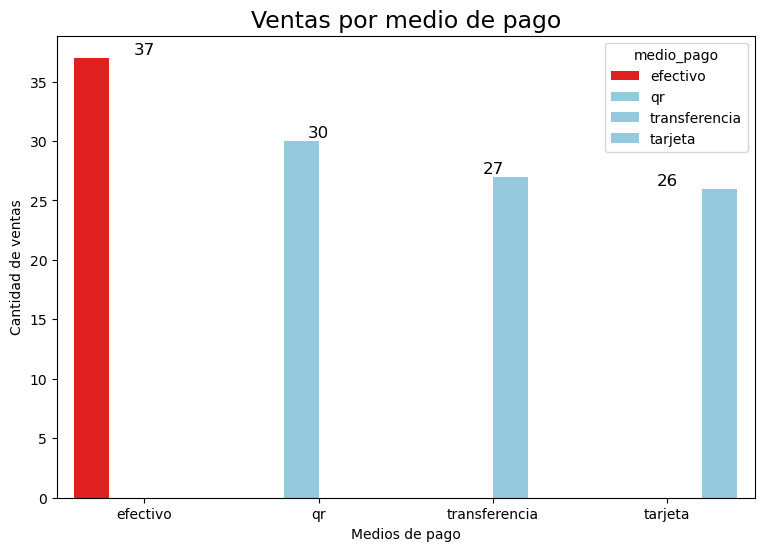

In [132]:
plt.figure(figsize=(9, 6))

# Crear paleta de colores: primera barra roja, las demás grises

colors = ['red'] + ['#87CEEB'] * (len(ventas_medio_pago) - 1)

# Crear el diagrama de barras

sns.barplot(ventas_medio_pago, x = 'medio_pago', y = 'count', hue='medio_pago', palette= colors)

# Etiquetar ejes

plt.xlabel('Medios de pago')
plt.ylabel('Cantidad de ventas')
plt.title('Ventas por medio de pago', fontsize = 17)

# Añadir etiquetas con los valores

for i, value in enumerate(ventas_medio_pago['count']):
    plt.text(i, value + 0.3, str(value), ha='center', fontsize=12, color='black')

# Mostrar el gráfico
plt.show()

Análisis

* 37 ventas se realizaron en efectivo. Esto muestra que muchos clientes aún prefieren pagar de forma tradicional, posiblemente por costumbre o comodidad.

* Los pagos digitales (QR, transferencia y tarjeta) en conjunto alcanzan 83 ventas, superando al efectivo. Esto indica que cada vez más personas optan por métodos digitales, reflejando una tendencia creciente hacia la digitalización.

* El método digital más utilizado es el pago mediante QR, ya que representa una alternativa rápida, cómoda y segura para los clientes.

Referencias:
* https://pepperfinance.es/blog/finanzas/8-metodos-pago-online-utilizados/

* https://prometeoapi.com/blog/pagos-digitales

* https://www.santander.com/es/stories/pagos-digitales-que-son-y-cuales-son-los-mas-usados

### Conclusiones

* La tienda Aurelion debería mantener el pago en efectivo para conservar a sus clientes tradicionales, pero también impulsar los pagos digitales por sus ventajas.
Estos métodos son más rápidos, seguros y cómodos, además de permitir registrar cada transacción automáticamente.
Facilitan el control de ingresos y gastos, reducen errores con el dinero físico y aportan información útil sobre el comportamiento del cliente.
En conjunto, mejoran la eficiencia y la toma de decisiones dentro del negocio.

## 13. ¿En qué ciudades generan más ingresos?

In [137]:
# ventas_df.columns

In [138]:
# detalle_ventas_df.columns

In [139]:
# cliente_df.columns

In [140]:
# productos_df.columns

In [143]:
# Unión del dataframe de dettale ventas y ventas.
df_cliente_venta = pd.merge(cliente_df, ventas_df, on = 'id_cliente')
df_cliente_venta.head()

,id_cliente,nombre_cliente_x,email_x,ciudad,fecha_alta,id_venta,fecha,nombre_cliente_y,email_y,medio_pago,mes,anio,nombre_mes
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo
1,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,105,2024-02-06,Mariana Lopez,mariana.lopez@mail.com,transferencia,2,2024,Febrero
2,2,Nicolas Rojas,nicolas.rojas@mail.com,Carlos Paz,2023-01-02,16,2024-04-12,Nicolas Rojas,nicolas.rojas@mail.com,efectivo,4,2024,Abril
3,3,Hernan Martinez,hernan.martinez@mail.com,Rio Cuarto,2023-01-03,115,2024-02-16,Hernan Martinez,hernan.martinez@mail.com,transferencia,2,2024,Febrero
4,5,Agustina Flores,agustina.flores@mail.com,Cordoba,2023-01-05,36,2024-06-25,Agustina Flores,agustina.flores@mail.com,tarjeta,6,2024,Junio


In [146]:
df_cliente_venta_detalleventa = pd.merge(df_cliente_venta, detalle_ventas_df_sin_outliers, on = 'id_venta')
df_cliente_venta_detalleventa.head()

,id_cliente,nombre_cliente_x,email_x,ciudad,fecha_alta,id_venta,fecha,nombre_cliente_y,email_y,medio_pago,mes,anio,nombre_mes,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,65,Cerveza Rubia 1L,1,2423,2423
1,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,18,Queso Rallado 150g,2,3444,6888
2,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,91,Desodorante Aerosol,3,4690,14070
3,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,8,Energética Nitro 500ml,3,4218,12654
4,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,105,2024-02-06,Mariana Lopez,mariana.lopez@mail.com,transferencia,2,2024,Febrero,13,Té Verde 20 saquitos,2,2383,4766


In [147]:
df_ciudad_importe = df_cliente_venta_detalleventa.groupby('ciudad')["importe"].sum().sort_values(ascending=False)
df_ciudad_importe = df_ciudad_importe.reset_index()
df_ciudad_importe

,ciudad,importe
0,Rio Cuarto,746248
1,Cordoba,460052
2,Alta Gracia,440204
3,Villa Maria,313350
4,Carlos Paz,307942
5,Mendiolaza,229026


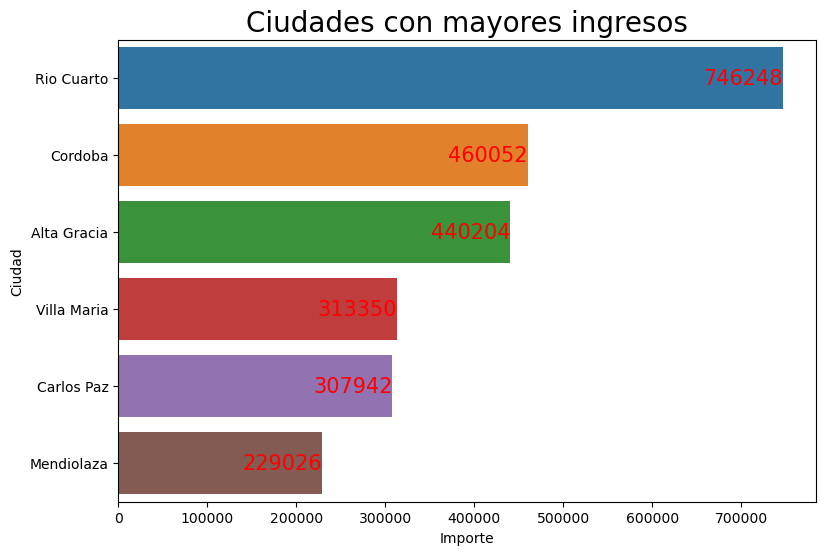

In [148]:
# Visualizaciones
plt.figure(figsize=(9, 6))

sns.barplot(df_ciudad_importe, y='ciudad', x='importe')
plt.xlabel('Importe')
plt.ylabel('Ciudad')
plt.title('Ciudades con mayores ingresos', fontsize = 20)

# Añadir etiquetas con los valores
for i, value in enumerate(df_ciudad_importe['importe']):
    plt.text(value - 0.5, i, str(value),
             ha='right', va='center',
             fontsize=15, color='red')

## 18. ¿En qué ciudades se realizaron más compras en cantidad?

In [149]:
df_ciudad_cantidad = df_cliente_venta_detalleventa.groupby('ciudad')["cantidad"].sum().sort_values(ascending=False)
df_ciudad_cantidad = df_ciudad_cantidad.reset_index()
df_ciudad_cantidad

,ciudad,cantidad
0,Rio Cuarto,289
1,Cordoba,195
2,Alta Gracia,175
3,Carlos Paz,116
4,Villa Maria,106
5,Mendiolaza,100


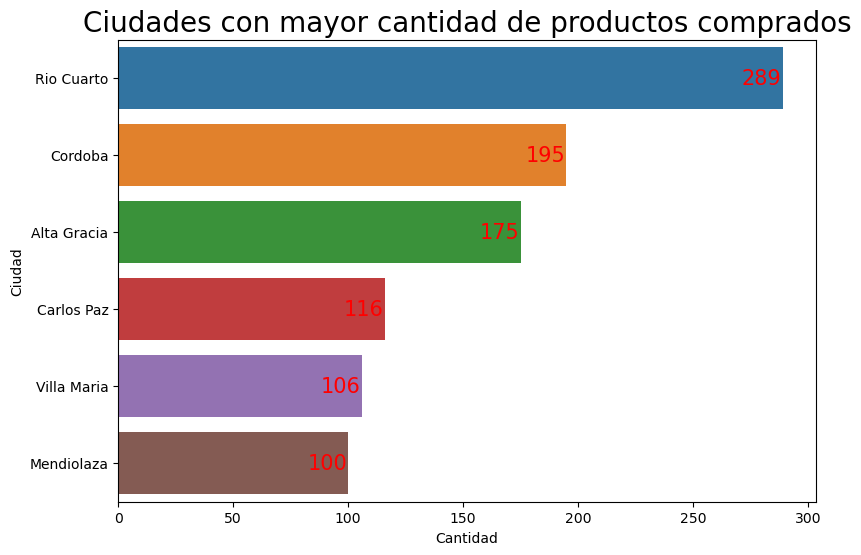

In [150]:
# Visualizaciones
plt.figure(figsize=(9, 6))

sns.barplot(df_ciudad_cantidad, y='ciudad', x='cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Ciudad')
plt.title('Ciudades con mayor cantidad de productos comprados', fontsize = 20)

# Añadir etiquetas con los valores
for i, value in enumerate(df_ciudad_cantidad['cantidad']):
    plt.text(value - 0.5, i, str(value),
             ha='right', va='center',
             fontsize=15, color='red')

#### Análisis de Ciudades con mayor cantidad de productos comprados y Ciudades con mayores ingresos


* Río Cuarto, Córdoba y Alta Gracia son las principales ciudades generadoras de ingresos y ventas para la tienda Aurelion.

* Río Cuarto, es la ciudad más importante para la tienda, ya que lidera tanto en ingresos como en cantidad de productos vendidos. Esto sugiere una base de clientes sólida, con alto poder adquisitivo y un volumen de compras considerable.

* Córdoba y Alta Gracia

Ambas ciudades ocupan el segundo y tercer lugar en ingresos y cantidad de productos vendidos. Son mercados estables con potencial de crecimiento; conviene impulsar campañas o descuentos dirigidos.

## 5. ¿Quiénes son los 20 clientes que más compran en términos de ingresos?

In [152]:
df_cliente_venta_detalleventa.head()

,id_cliente,nombre_cliente_x,email_x,ciudad,fecha_alta,id_venta,fecha,nombre_cliente_y,email_y,medio_pago,mes,anio,nombre_mes,id_producto,nombre_producto,cantidad,precio_unitario,importe
0,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,65,Cerveza Rubia 1L,1,2423,2423
1,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,18,Queso Rallado 150g,2,3444,6888
2,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,91,Desodorante Aerosol,3,4690,14070
3,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,54,2024-03-26,Mariana Lopez,mariana.lopez@mail.com,tarjeta,3,2024,Marzo,8,Energética Nitro 500ml,3,4218,12654
4,1,Mariana Lopez,mariana.lopez@mail.com,Carlos Paz,2023-01-01,105,2024-02-06,Mariana Lopez,mariana.lopez@mail.com,transferencia,2,2024,Febrero,13,Té Verde 20 saquitos,2,2383,4766


In [153]:
df_cliente_importe = df_cliente_venta_detalleventa.groupby('nombre_cliente_x')['importe'].sum().sort_values(ascending=False).head(20)
df_cliente_importe = df_cliente_importe.reset_index()
df_cliente_importe.rename(columns={'nombre_cliente_x': 'nombre_cliente'}, inplace=True)
df_cliente_importe


,nombre_cliente,importe
0,Agustina Flores,132158
1,Bruno Castro,95030
2,Bruno Diaz,90701
3,Diego Diaz,90522
4,Mariana Lopez,72448
5,Olivia Gomez,71321
6,Pablo Sanchez,67575
7,Camila Rodriguez,65001
8,Santiago Diaz,64786
9,Felipe Diaz,64716


#### Análisis:

* Agustina Flores destaca como la clienta que más ingresos generó para la tienda, posicionándose como la principal contribuyente en términos de ventas totales.

* Bruno Castro, Bruno Díaz y Diego Díaz ocupan las siguientes posiciones, con montos que oscilan entre 90,000 y 96,000, lo que evidencia un segmento de clientes con alto nivel de gasto y potencial valor para la empresa.

## 9. ¿Cuál es el valor promedio por pedido?

In [158]:
#ventas_df.head()

In [159]:
df_ventas_por_mes = ventas_df[['mes', 'nombre_mes']].value_counts().sort_index(ascending= True)
df_ventas_por_mes = df_ventas_por_mes.reset_index()
df_ventas_por_mes
## count = numero de pedidos

,mes,nombre_mes,count
0,1,Enero,24
1,2,Febrero,20
2,3,Marzo,21
3,4,Abril,12
4,5,Mayo,22
5,6,Junio,21


In [160]:
#df_detallevent_ventas.head()

In [161]:
df_importe_por_mes = df_detallevent_ventas.groupby(['mes', 'nombre_mes'])['importe'].sum().reset_index().sort_values(by='mes')
df_importe_por_mes

,mes,nombre_mes,importe
0,1,Enero,506080
1,2,Febrero,407041
2,3,Marzo,367813
3,4,Abril,229374
4,5,Mayo,516117
5,6,Junio,470397


In [165]:
valor_promedio_por_pedido = {}

for i in range(len(df_ventas_por_mes)):
    mes = df_ventas_por_mes.iloc[i, 1]  # Suponiendo que la primera columna es 'mes'
    importe = df_importe_por_mes.iloc[i, 2]
    ventas = df_ventas_por_mes.iloc[i, 2]

    valor_promedio_por_pedido[mes] = round(importe / ventas, 2)
print(valor_promedio_por_pedido)

{'Enero': 21086.67, 'Febrero': 20352.05, 'Marzo': 17514.9, 'Abril': 19114.5, 'Mayo': 23459.86, 'Junio': 22399.86}


In [166]:
valor_promedio_por_pedido = pd.DataFrame(valor_promedio_por_pedido.items(), columns=['mes', 'valor_promedio_por_pedido'])
valor_promedio_por_pedido

,mes,valor_promedio_por_pedido
0,Enero,21086.67
1,Febrero,20352.05
2,Marzo,17514.90
3,Abril,19114.50
4,Mayo,23459.86
5,Junio,22399.86


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


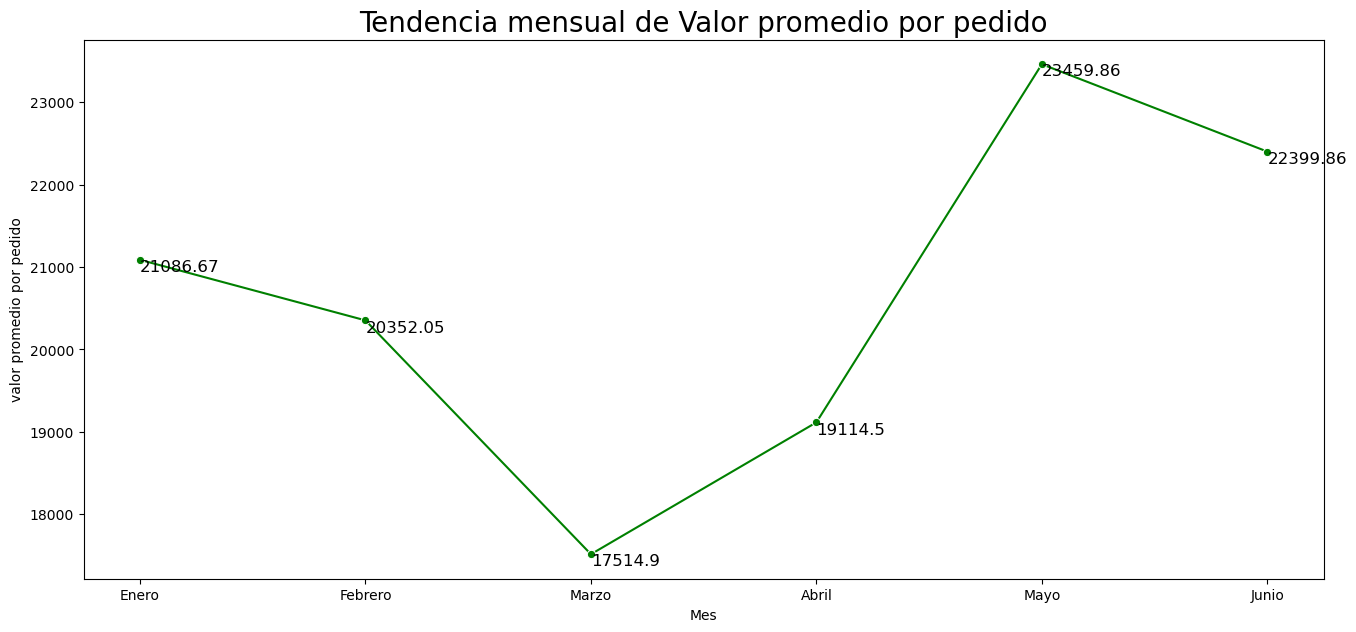

In [167]:
plt.figure(figsize=(16, 7))

# Crear el gráfico de líneas
sns.lineplot(valor_promedio_por_pedido, x= 'mes', y = 'valor_promedio_por_pedido', color = 'green', linestyle='-', marker='o')

# Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('valor promedio por pedido')
plt.title("Tendencia mensual de Valor promedio por pedido", fontsize = 20)
# Agregar etiquetas sobre cada punto
for i in range(len(mes_importe)):
    plt.text(valor_promedio_por_pedido['mes'][i],
             valor_promedio_por_pedido['valor_promedio_por_pedido'][i] + 5,   # Ajusta la altura de la etiqueta
             str(valor_promedio_por_pedido['valor_promedio_por_pedido'][i]),
             ha='left', va='top', fontsize=12, color='black')
plt.show()

#### Análisis:

* El mes 3 (17,514.9) registró el menor Valor Promedio por Pedido. Este valor mínimo se produce en medio de una reducción progresiva en los ingresos y cantidad vendidad, lo que indica que los clientes compraron ítems de precio unitario bajo.

* En el mes 5, se alcanzó su máximo monto promedio gastado por cada pedido , combinado con la recuperación del ingreso y cantiadad vendidad.Lo que índica que los clientes compraron ítems de precio unitario más levado.


## 8. ¿Cuántos pedidos totales se han realizado?

In [171]:
# ventas_df.head()
# Cada fila en la tabla ventas representa un pedido realizado por un cliente (una venta completa).

In [172]:
# detalle_ventas_df_sin_outliers.head()
# En cambio, la tabla detalle_ventas_df desglosa los productos dentro de cada pedido (por eso un mismo id_venta puede repetirse varias veces).

In [174]:
predidos_totales = ventas_df.shape[0]
print(predidos_totales)

120


* Durante el periodo de enero a junio de 2024, la tienda realizó un total de 120 pedidos.

## 7. ¿Cuál es la compra media por cliente?

In [186]:
df_detallevent_ventas.columns

Index(['id_venta', 'fecha', 'id_cliente', 'nombre_cliente', 'email',
       'medio_pago', 'mes', 'anio', 'nombre_mes', 'id_producto',
       'nombre_producto', 'cantidad', 'precio_unitario', 'importe'],
      dtype='object')

In [188]:
df_detallevent_ventas['nombre_mes'].unique().tolist()

['Junio', 'Marzo', 'Enero', 'Febrero', 'Mayo', 'Abril']

In [190]:
mes_clientes = {}

for i in ['Enero', 'Febrero', 'Marzo', 'Abril' , 'Mayo','Junio']:
    mes = str(i)
    otros_datos = df_detallevent_ventas[df_detallevent_ventas['nombre_mes'] == i]
    #cantidad_clientes = mes['id_cliente'].unique().shape[0]
    mes_clientes[mes] = otros_datos['id_cliente'].unique().shape[0]
print(mes_clientes)

{'Enero': 23, 'Febrero': 17, 'Marzo': 19, 'Abril': 10, 'Mayo': 17, 'Junio': 18}


In [191]:
df_mes_clientes = pd.DataFrame(mes_clientes.items(), columns=['mes', 'numero_clientes'])
df_mes_clientes

,mes,numero_clientes
0,Enero,23
1,Febrero,17
2,Marzo,19
3,Abril,10
4,Mayo,17
5,Junio,18


In [201]:
compra_media_por_cliente = {}

for i in range(df_mes_clientes.shape[0]):
    mes = df_mes_clientes.iloc[i, 0]  # Suponiendo que la primera columna es 'mes'
    importe = df_importe_por_mes.iloc[i, 2]
    clientes = df_mes_clientes.iloc[i, 1]

    compra_media_por_cliente[mes] = round(importe / clientes, 2)
print(compra_media_por_cliente)

{'Enero': 22003.48, 'Febrero': 23943.59, 'Marzo': 19358.58, 'Abril': 22937.4, 'Mayo': 30359.82, 'Junio': 26133.17}


In [202]:
compra_media_por_cliente = pd.DataFrame(compra_media_por_cliente.items(), columns=['mes', 'compra_media_por_cliente'])
compra_media_por_cliente

,mes,compra_media_por_cliente
0,Enero,22003.48
1,Febrero,23943.59
2,Marzo,19358.58
3,Abril,22937.40
4,Mayo,30359.82
5,Junio,26133.17


d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anacondapython\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


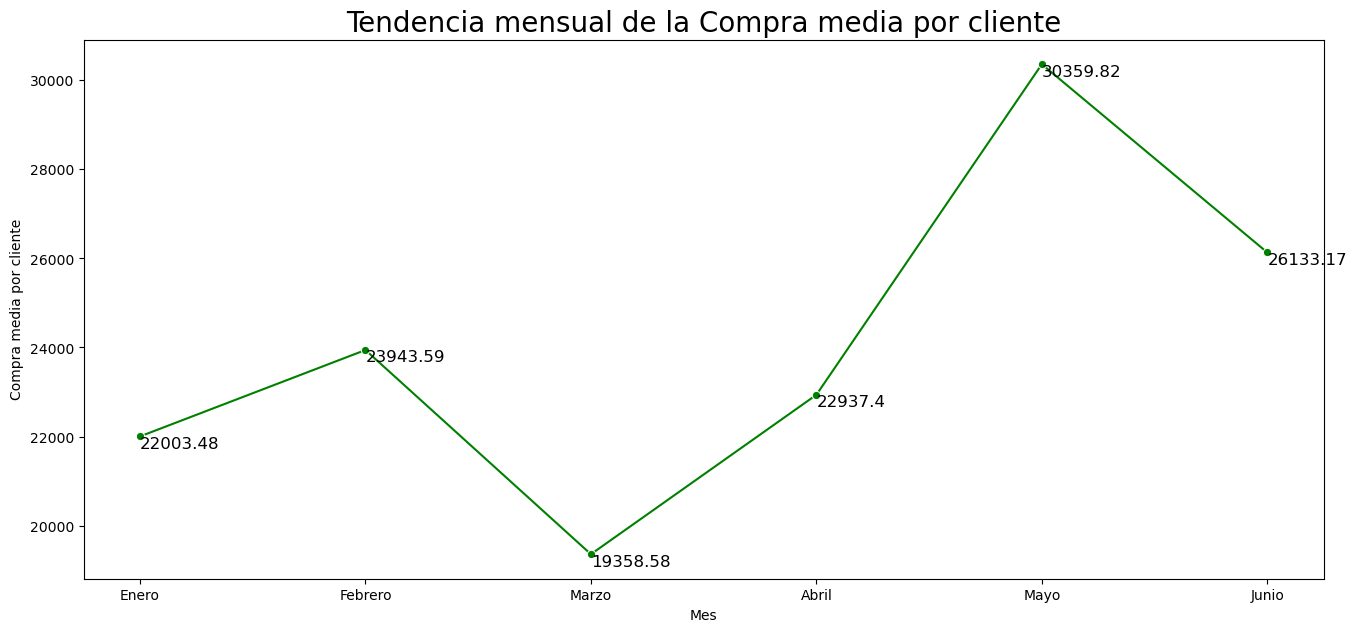

In [203]:
plt.figure(figsize=(16, 7))

# Crear el gráfico de líneas
sns.lineplot(compra_media_por_cliente, x= 'mes', y = 'compra_media_por_cliente', color = 'green', linestyle='-', marker='o')

# Etiquetas de los ejes
plt.xlabel('Mes')
plt.ylabel('Compra media por cliente')
plt.title("Tendencia mensual de la Compra media por cliente", fontsize = 20)
# Agregar etiquetas sobre cada punto
for i in range(len(mes_importe)):
    plt.text(compra_media_por_cliente['mes'][i],
             compra_media_por_cliente['compra_media_por_cliente'][i] + 5,   # Ajusta la altura de la etiqueta
             str(compra_media_por_cliente['compra_media_por_cliente'][i]),
             ha='left', va='top', fontsize=12, color='black')

    # Valor promedio por pedido
    # interpretación: refleja el monto promedio gastado cada vez que se realiza una compra.

#### Análisis:

* El mes de marzo (19358.58 ARS) registró el menor gasto promedio por cliente, lo que coincide con una reducción progresiva en las ventas y pedido. Esto indica un periodo de baja actividad comercial.

* En mayo, el gasto promedio por cliente alcanzó su máximo valor (30359.82 ARS). Aunque no fue el mes con mayor cantidad vendida, este resultado sugiere que los clientes realizaron compras de mayor valor unitario, elevando así el ingreso total.

* En junio, el gasto promedio por cliente fue de 26133.17 ARS, manteniéndose en un nivel alto respecto a los meses anteriores, aunque con una ligera disminución respecto a mayo.

## Correlaciones entre variables

El coeficiente de correlación de Spearman, a menudo simbolizado por $ρ$ (rho), evalúa las relaciones monótonas. En una relación monótona, las variables tienden a moverse en la misma dirección relativa, pero no necesariamente a un ritmo constante.

Spearman, sin embargo, puede manejar datos ordinales y relaciones no lineales. Es robusto frente a valores atípicos y distribuciones no normales, lo que lo hace versátil para varios tipos de datos.

* https://support.minitab.com/es-mx/minitab/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/linear-nonlinear-and-monotonic-relationships/
* https://numiqo.es/tutorial/spearman-correlation
* https://www.linkedin.com/advice/0/what-differences-between-pearson-spearman-correlation-ynykc?lang=es




En este caso ninguna de las varibles tiene una distribución normal.


In [211]:
correlation_matrix = df_detallevent_ventas[['precio_unitario', 'importe', 'cantidad']].corr('spearman')
print(correlation_matrix)

                 precio_unitario   importe  cantidad
precio_unitario         1.000000  0.686701 -0.111802
importe                 0.686701  1.000000  0.591842
cantidad               -0.111802  0.591842  1.000000


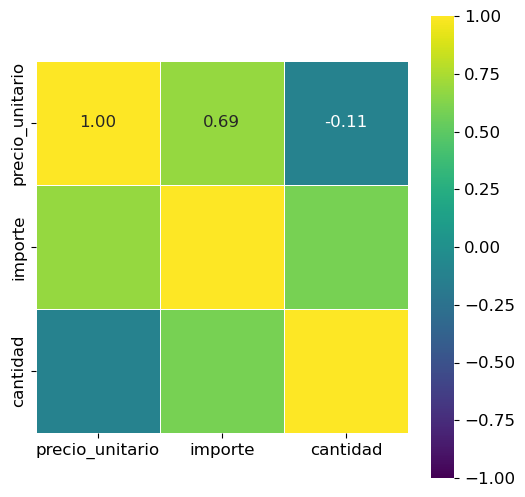

In [212]:
plt.figure(figsize = (6,6))
# plt.rcParams.update({'font.size': 12})
# sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
# plt.show()
plt.rcParams.update({'font.size': 12})
sns.heatmap(
    correlation_matrix, 
    cmap = 'viridis', 
    vmin = -1, 
    vmax = 1, 
    center = 0, 
    annot=True,     # <--- Esto indica que ponga texto en todos.
    fmt=".2f", 
    square=True, 
    linewidths=.5
)
plt.show()

#### Análisis.

* Precio unitario tiene correlación negativa con la cantidad.

* Precio unitario tiene correlación alta con el importe.

* Cantidad tiene correlación alta con el importe.